In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
cropdata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigDataCrops.csv")

In [ ]:
cropdata

,Year,CropName,Province,Area,Production
0,1947-48,Barley,Punjab,230.00,68.0
1,1948-49,Barley,Punjab,336.00,123.0
2,1949-50,Barley,Punjab,277.00,90.0
3,1950-51,Barley,Punjab,256.00,79.0
4,1951-52,Barley,Punjab,253.00,64.0
...,...,...,...,...,...
2039,2015-16,Sugarcane,Balochistan,1.73,31.7
2040,2016-17,Sugarcane,Balochistan,1.73,31.6
2041,2017-18,Sugarcane,Balochistan,2.22,43.4
2042,2018-19,Sugarcane,Balochistan,2.22,44.3


In [ ]:
cropdata.drop(['Year'], axis = 1)

,CropName,Province,Area,Production
0,Barley,Punjab,230.00,68.0
1,Barley,Punjab,336.00,123.0
2,Barley,Punjab,277.00,90.0
3,Barley,Punjab,256.00,79.0
4,Barley,Punjab,253.00,64.0
...,...,...,...,...
2039,Sugarcane,Balochistan,1.73,31.7
2040,Sugarcane,Balochistan,1.73,31.6
2041,Sugarcane,Balochistan,2.22,43.4
2042,Sugarcane,Balochistan,2.22,44.3


In [ ]:
total_production = cropdata.groupby(['Year', 'CropName'], as_index=False)['Area','Production'].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
total_production

,Year,CropName,Area,Production
0,1947-48,Barley,415.00,111.00
1,1947-48,Cotton,3056.00,188.12
2,1947-48,Groundnut,1.00,0.00
3,1947-48,Maize,899.00,353.00
4,1947-48,Rice,1952.00,682.00
...,...,...,...,...
506,2019-20,Groundnut,254.31,94.52
507,2019-20,Maize,3470.08,7883.70
508,2019-20,Rice,7513.50,7205.92
509,2019-20,Sugarcane,2435.20,66379.63


In [ ]:
from sklearn.preprocessing import LabelEncoder
total_production['CropName'] = LabelEncoder().fit_transform(total_production['CropName'].values)

In [ ]:
total_production = total_production.drop(['Year'], axis = 1)

In [ ]:
total_production

,CropName,Area,Production
0,0,415.00,111.00
1,1,3056.00,188.12
2,2,1.00,0.00
3,3,899.00,353.00
4,4,1952.00,682.00
...,...,...,...
506,2,254.31,94.52
507,3,3470.08,7883.70
508,4,7513.50,7205.92
509,5,2435.20,66379.63


In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
reg.fit(total_production[['CropName','Area']],total_production.Production)

LinearRegression()

In [ ]:
reg.coef_

array([ 4.54705168e+03, -4.23485362e-01])

In [ ]:
reg.intercept_

-4141.465362564365

In [ ]:
reg.predict([[3,1312.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([8943.99217178])

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
model = smf.ols(formula='Production ~ Area + CropName', data=total_production)
results_formula = model.fit()
results_formula.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Intercept   -4141.465363
Area           -0.423485
CropName     4547.051675
dtype: float64

In [ ]:
## Prepare the data for Visualization

x_surf, y_surf = np.meshgrid(np.linspace(total_production.Area.min(), total_production.Area.max(), 100),np.linspace(total_production.CropName.min(), total_production.CropName.max(), 100))
onlyX = pd.DataFrame({'Area': x_surf.ravel(), 'CropName': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [ ]:

## convert the predicted result in an array
fittedY=np.array(fittedY)

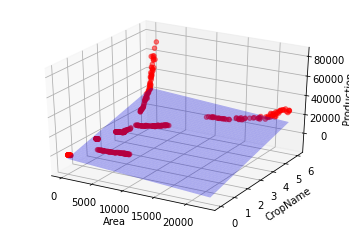

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(total_production['Area'],total_production['CropName'],total_production['Production'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Area')
ax.set_ylabel('CropName')
ax.set_zlabel('Production')
plt.show()

In [ ]:
total_production

,CropName,Area,Production
0,0,415.00,111.00
1,1,3056.00,188.12
2,2,1.00,0.00
3,3,899.00,353.00
4,4,1952.00,682.00
...,...,...,...
506,2,254.31,94.52
507,3,3470.08,7883.70
508,4,7513.50,7205.92
509,5,2435.20,66379.63


In [ ]:

#Create Feature Matrix and Dependent Variable Vector
X = total_production.iloc[:, :-1].values
y = total_production.iloc[:,2].values

In [ ]:
y.shape


(511,)

In [ ]:
X.astype(int)

array([[    0,   415],
       [    1,  3056],
       [    2,     1],
       ...,
       [    4,  7513],
       [    5,  2435],
       [    6, 21750]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 0)


In [ ]:
len(X_test)


154

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
MLR = LinearRegression()
MLR.fit(X_train, y_train)


LinearRegression()

In [ ]:
#Print the constant and coeffcients
print(f'constant = {MLR.intercept_}')
print(f'coefficients = {MLR.coef_}')

constant = -4186.098509394394
coefficients = [ 4.84739563e+03 -5.42090228e-01]


In [ ]:
# Predicting the Test set results
y_predict = MLR.predict(X_test)


In [ ]:
y_predict

array([ 9212.54905135,  5494.05631875,  5508.15066468, 13842.83754723,
        5366.96868573, 18363.37758642, -4482.95253908,  -826.19846255,
       18829.60457697,  5446.40658772,  9485.56737372, -2126.32598148,
        5419.61106776, -4301.30352462,  5398.04671849,  9087.38583863,
       12573.96695083,  9091.50030346, 17993.12996078,  9780.38856505,
       12394.58929443, 18724.95176842, 19006.29346584, -3495.35858929,
       -4418.65521715,  5448.27679901, 18995.57634204, 12780.62884919,
       -1308.60455634,  9194.3619242 , 18835.49709775,  5383.17176264,
        9488.74402245,  9477.13244977, 19518.54704758, 14390.10015667,
       -4406.31724357, 18684.29500133, -1660.56205769,  5492.43004807,
       13315.3837555 , -2904.87596676,  9741.90015887, 16647.11992495,
       -1690.45291285,  9068.55904502, 12019.89652892, 18175.27227735,
       15623.57226118,  -995.33061364,  5397.64557173, -4298.75027965,
        9113.12428265, -4399.4923276 ,  5383.43738685,  5459.79621635,
      

In [ ]:
# Display actual and predicted values side by side
df = pd.DataFrame(data=y_test, columns=['y_test'])
df['y_predict'] = y_predict
df

,y_test,y_predict
0,1126.5,9212.549051
1,15.0,5494.056319
2,1.0,5508.150665
3,906.0,13842.837547
4,76.4,5366.968686
...,...,...
149,682.0,14145.323894
150,1213.0,9179.243028
151,3444.7,12553.746985
152,88.0,5411.436347


In [ ]:
# Predicting the sigle observation results. Here 1,0 represents that the city is Mumbai
singl_obs = [1,1400]
feature_array = np.array(singl_obs)
feature_array = feature_array.reshape(1, -1)
y_pred_single_obs = MLR.predict(feature_array)
round(float(y_pred_single_obs), 2)


-97.63

In [ ]:

#Model Evaluation using R-Square
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error:', r_square)

R-Square Error: 0.32452693143450984


Random Forest

In [ ]:

# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Import the Height Weight Dataset 
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigDataCrops.csv")
data.head()

,Year,CropName,Province,Area,Production
0,1947-48,Barley,Punjab,230.0,68.0
1,1948-49,Barley,Punjab,336.0,123.0
2,1949-50,Barley,Punjab,277.0,90.0
3,1950-51,Barley,Punjab,256.0,79.0
4,1951-52,Barley,Punjab,253.0,64.0


In [ ]:
total_production = cropdata.groupby(['Year', 'CropName'], as_index=False)['Area','Production'].sum()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
total_production

,Year,CropName,Area,Production
0,1947-48,Barley,415.00,111.00
1,1947-48,Cotton,3056.00,188.12
2,1947-48,Groundnut,1.00,0.00
3,1947-48,Maize,899.00,353.00
4,1947-48,Rice,1952.00,682.00
...,...,...,...,...
506,2019-20,Groundnut,254.31,94.52
507,2019-20,Maize,3470.08,7883.70
508,2019-20,Rice,7513.50,7205.92
509,2019-20,Sugarcane,2435.20,66379.63


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

total_production['Year'] = LabelEncoder().fit_transform(total_production['Year'].values)
total_production['CropName'] = LabelEncoder().fit_transform(total_production['CropName'].values)


In [ ]:
from sklearn.preprocessing import LabelEncoder
total_production['Year'] = LabelEncoder().fit_transform(total_production['Year'].values)
total_production['CropName'] = LabelEncoder().fit_transform(total_production['CropName'].values)

In [ ]:
#Store the data in the form of dependent and independent variables separately
X = total_production[['Year','CropName', 'Area']]
y = total_production.loc[:, 'Production'].values

In [ ]:
X

,Year,CropName,Area
0,0,0,415.00
1,0,1,3056.00
2,0,2,1.00
3,0,3,899.00
4,0,4,1952.00
...,...,...,...
506,72,2,254.31
507,72,3,3470.08
508,72,4,7513.50
509,72,5,2435.20


In [ ]:
#Display feature matrix once the one hot encoding is done
X.astype(int)

ValueError: ignored

In [ ]:
#Split the Dataset into Training and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,stratify = X['CropName'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(408, 3) (103, 3) (408,) (103,)


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

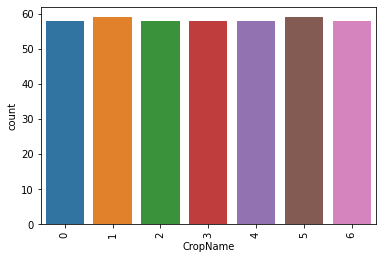

In [ ]:
import seaborn
seaborn.countplot(x='CropName', data=X_train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

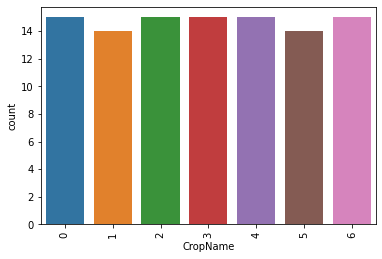

In [ ]:
import seaborn
seaborn.countplot(x='CropName', data=X_test)
plt.xticks(rotation=90)

In [ ]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 20, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [ ]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict_rfr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict_rfr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict_rfr)))

R-Square Error associated with Random Forest Regression is: 0.9893434014668772
Mean Absolute Error: 556.0685533980587
Mean Squared Error: 2338222.643375154
Root Mean Squared Error: 1529.1247965340024


In [ ]:
X_test

,Year,CropName,Area
283,40,3,2109.50
29,4,1,3318.00
131,18,5,1476.00
469,67,0,167.78
174,24,6,14325.21
...,...,...,...
421,60,1,7547.48
264,37,5,2232.89
266,38,0,466.55
257,36,5,2215.34


In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==0
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==0
# filtering data
predicted_crops.where(filter, inplace = True)


In [ ]:
# Display actual and predicted values side by side
df = pd.DataFrame(data=y_test, columns=['y_test'])
df['y_predict'] = y_predict_rfr
df

,y_test,y_predict
0,1709.01,1869.017
1,432.00,478.950
2,157.00,126.475
3,26673.60,25161.570
4,8367.20,9262.055
...,...,...
98,979.00,1078.750
99,6827.00,6470.890
100,21635.00,23307.415
101,122.50,131.500


In [ ]:
df = pd.DataFrame(data=crops, columns=['Production'])
df['y_predict'] = predicted_crops['Production']
df

,Production,y_predict
393,NaN,NaN
94,NaN,NaN
70,157.0,126.475
489,NaN,NaN
216,NaN,NaN
...,...,...
88,NaN,NaN
500,NaN,NaN
138,NaN,NaN
287,122.5,131.500


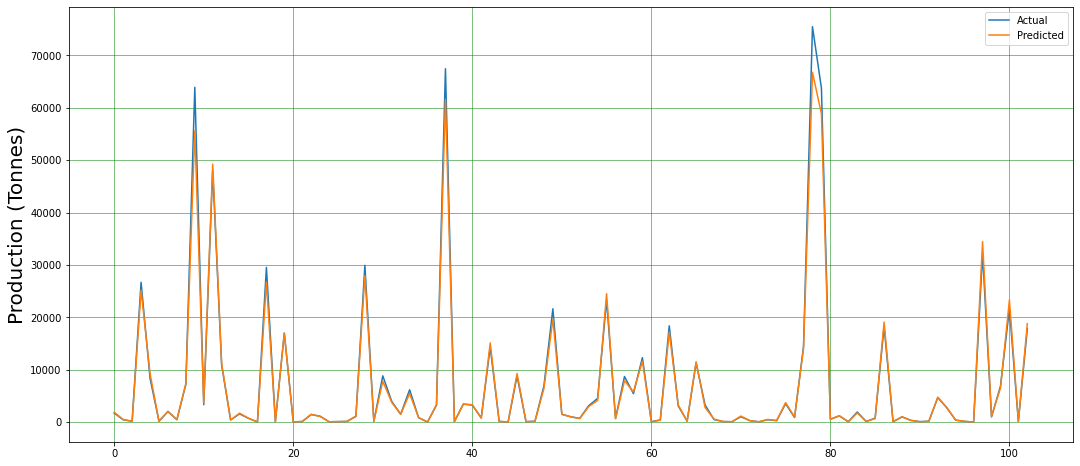

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
#X_train, y_trainy_test, y_predict_rfr

#df = pd.DataFrame({'Actual': crops['Production'], 'Predicted': predicted_crops['Production']})
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict_rfr})

df.plot(kind='line',figsize=(18,8))
#plt.xlabel('', fontsize=14)
plt.ylabel('Production (Tonnes)', fontsize=20)
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

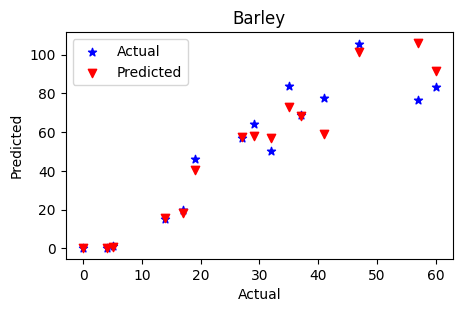

In [ ]:
import matplotlib.pyplot as plt

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Barley')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

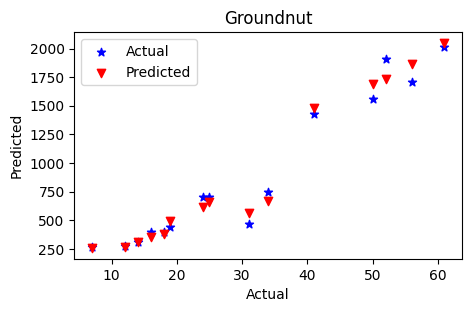

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==1
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==1
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Groundnut')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

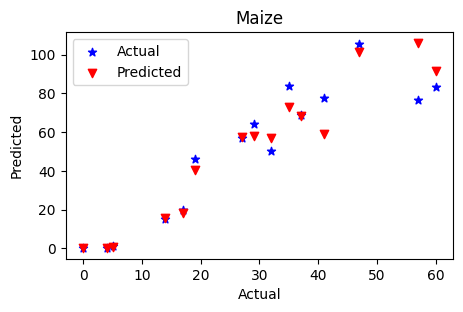

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==2
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==2
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Maize')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

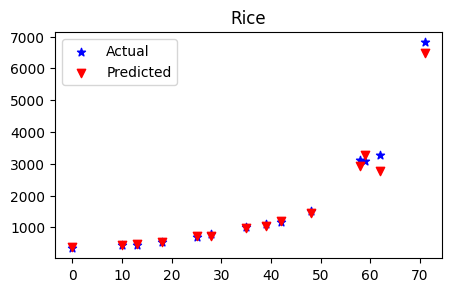

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==3
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==3
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Rice')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

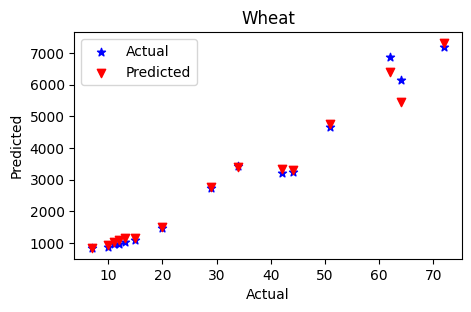

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==4
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==4
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Wheat')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

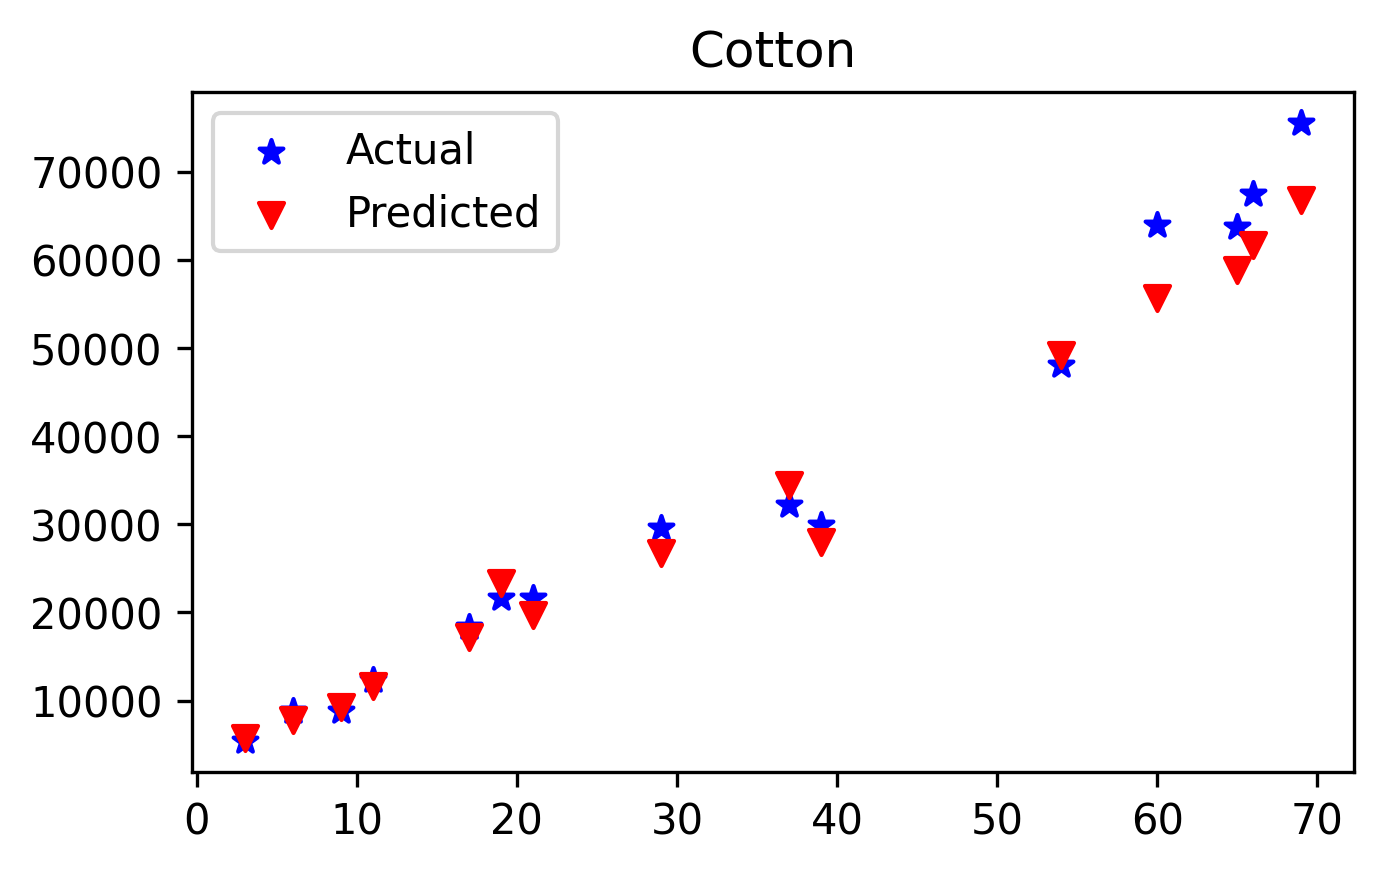

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==5
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==5
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Cotton')
#plt.xlabel('Actual')
#plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

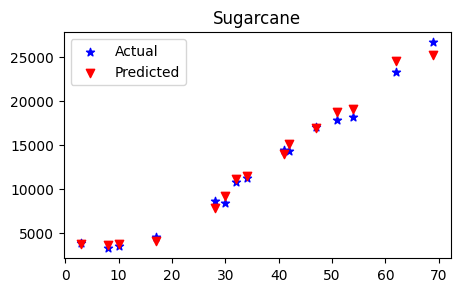

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test

filter = crops["CropName"]==6
# filtering data
crops.where(filter, inplace = True)


predicted_crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
predicted_crops['Production'] = y_predict_rfr
predicted_crop = predicted_crops.groupby('CropName')

filter = predicted_crops["CropName"]==6
# filtering data
predicted_crops.where(filter, inplace = True)

# Plot
plt.rcParams.update({'figure.figsize':(5,3), 'figure.dpi':100})
plt.scatter(crops['Year'],crops['Production'],color='blue', marker= '*', label='Actual')
plt.scatter(predicted_crops['Year'],predicted_crops['Production'],color= 'red', marker='v', label='Predicted')

# Decorate
plt.title('Sugarcane')
#plt.xlabel('Actual')
#plt.ylabel('Predicted')
plt.legend(loc='best')
plt.show()

In [ ]:
crops = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
crops['Production'] = y_test
array = [0,1,2]
barley = crops.loc[crops['CropName'].isin(0)].df['one'].tolist()
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

TypeError: ignored

<BarContainer object of 4 artists>

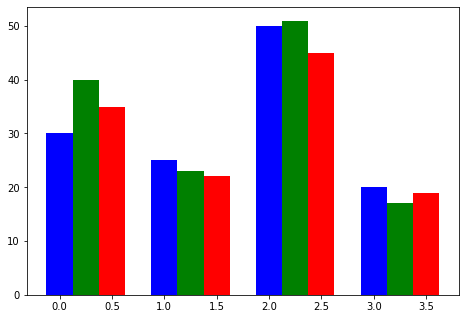

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
data = [[30, 25, 50, 20],
[40, 23, 51, 17],
[35, 22, 45, 19]]
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

In [ ]:
df = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])
# applying groupby() function to
# group the data on team value.
gk = df.groupby('CropName')
  
# Let's print the first entries
# in all the groups formed.
gk.first()
# Finding the values contained in the "Boston Celtics" group
gk.get_group(1)

,Year,Area
393,56,7386.86
302,43,6578.56
1,0,3056.00
141,20,4411.30
232,33,5210.31
274,39,6190.60
134,19,4003.30
414,59,7598.13
204,29,4607.87
92,13,3194.60


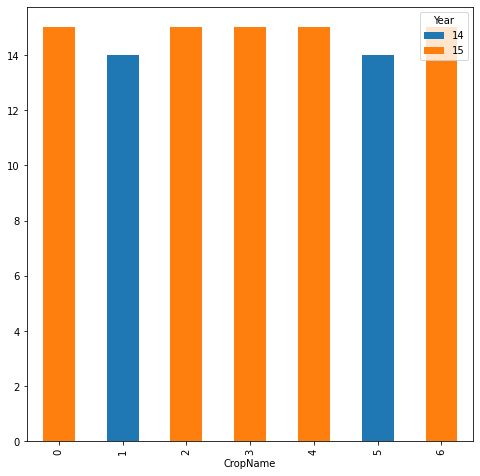

In [ ]:
df = pd.DataFrame(data=X_test, columns=['Year','CropName','Area'])

sd = df.groupby(['CropName'])['Year'].nunique().reset_index()

sd.pivot(index='CropName',values='Year',columns='Year').plot(kind='bar',stacked=True,figsize=(8,8))

Decision Tree

In [ ]:
# Import necessary libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Import the Height Weight Dataset 
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BigDataCrops.csv")
data.head()

,Year,CropName,Province,Area,Production
0,1947-48,Barley,Punjab,230.0,68.0
1,1948-49,Barley,Punjab,336.0,123.0
2,1949-50,Barley,Punjab,277.0,90.0
3,1950-51,Barley,Punjab,256.0,79.0
4,1951-52,Barley,Punjab,253.0,64.0
